### Classification d'espèces d'Iris

L'objectif de ce notebook est la classification des espèces d'Iris en fonction de critères morphologiques liés aux fleurs (pétales et sépales). <br/>

Nous allons utiliser deux algorithmes : KNN et Regression logistique.

#### Présentation du dataset

Notre dataset contient 3 catégories correspondant chacune à une espèce d'Iris : versicolor, setosa ou verginica. <br/>

Ce dataset contient également 4 features : longueur et largeur du pétale; longueur et largeur du sépale. <br/>
Pour chaque plante, l'espèce à déjà été identifiée et est renseignée dans le dataset. <br/>

La question est donc : Peut-on prédire l'espèce d'une nouvelle plante croisée, en fonction de ses mensurations florales ?

<div>
<img src="ressources/three-kinds.png" width="700"/>
</div>

<div>
<img src="ressources/Iris-image.png" width="500"/>
</div>

Les données sont sauvegardées dans un fichier "iris.csv".

<div>
<img src="ressources/raw-data.png" width="400"/>
</div>

#### Chargement du dataset (Pandas)

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Chargement des données dans un dataframe Iris 
iris = pd.read_csv('iris.csv')

In [4]:
# Affiche les premières lignes du dataset (par défaut 5)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Liste des types de chaque colonnes, nombre de valeurs, et usage mémoire
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Vérifie la présence de NULL
iris.isnull().sum()
# Au besoin : iris.dropna() supprime les lignes avec des valeurs NULL

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# Affiche les valeurs uniques contenues dans la série 'species'
categories = iris['species'].unique()
print(categoriesries)

['setosa' 'versicolor' 'virginica']


In [8]:
# Affiche des statistiques descriptives sur les colonnes
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Visualisation des données

In [36]:
import matplotlib.pyplot as plt

# Categorisation 
setosa = iris[iris["species"]=="setosa"]
versicolor = iris[iris["species"]=="versicolor"]
verginica = iris[iris["species"]=="virginica"]

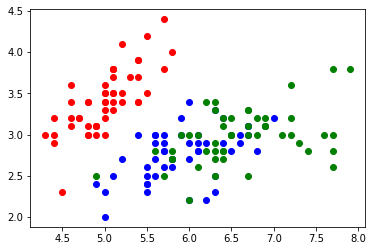

In [37]:
plt.scatter(setosa.values[:, 0], setosa.values[:, 1],c="red" )
plt.scatter(versicolor.values[:, 0], versicolor.values[:, 1], c="blue")
plt.scatter(verginica.values[:,0], verginica.values[:,1], c="green")
plt.show()

#### Séparation du dataset en jeu d'entrainement / jeu de validation

Il faut au préalable ôter les labels précisant l'espèce à nos données, si on veut que notre modèle les prédisent. <br/>
On va donc obtenir deux jeux de données : <br/>
* x : 4 mesures florales.
* y : labels de l'espèce.

In [9]:
# Récupérer les colonnes 0 à 3 du dataset
X = iris.iloc[:, 0:4]
# Récupérer la colonne 4 du dataset
y = iris.iloc[:,4]

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Vérifions le type de X et y : 

In [11]:
print("X's type : " + str(type(X)))
print("y's type : " + str(type(y)))

X's type : <class 'pandas.core.frame.DataFrame'>
y's type : <class 'pandas.core.series.Series'>


On va effectuer le découpage train vs. test via une fonction hyper utile de sklearn : train_test_split. <br/>
Cela split un array ou une matrice en des subsets aléatoires : train et test.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
# test_size définit la part de notre dataset qui sera dédié au test de notre modèle (entre 0 et 1)
# random_state : seed permettant la reproductibilité des résultats

In [13]:
print("X_train's shape" + str(X_train.shape))
print("y_train's shape" + str(y_train.shape))
print("X_test's shape" + str(X_test.shape))
print("y_test's shape" + str(y_test.shape))

X_train's shape(120, 4)
y_train's shape(120,)
X_test's shape(30, 4)
y_test's shape(30,)


#### Entrainement des modèles

##### Modèle n°1 : KNN (K nearest neighbors)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Crée une instance de l'algorithme KNN pour 1 voisin
knn = KNeighborsClassifier(n_neighbors=1)
# fit permet d'entrainer notre modèle aux données
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Evaluer le modèle : 

In [27]:
# Prédiction des labels pour les échantillons contenus dans X_test
y_knn = knn.predict(X_test)
print("Test set score : {:.2f}".format(knn.score(X_test,y_test)))

Test set score : 0.98


L'exactitude de notre modèle est de 0.98 ; cela signifie que la prédiction a été correcte pour 98% des iris du jeu de test. <br/>

Cela en fait donc un modèle crédible et pertinent à utiliser pour la reconnaissance des espèces d'Iris.

##### Modèle n°2 : Regression logistique

In [31]:
from sklearn.linear_model import LogisticRegression

# Crée une instance de l'algorithme de regression linéaire
logreg = LogisticRegression(solver='liblinear', multi_class='auto')
# liblinear est un bon choix vu la petitesse de notre dataset

logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

<div>
<img src="ressources/logisticR.png" width="500"/>
</div>

In [32]:
y_reglin = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_reglin))

0.8888888888888888


In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_reglin))
print(logreg.classes_)

[[16  0  0]
 [ 0 13  5]
 [ 0  0 11]]
['setosa' 'versicolor' 'virginica']


L'exactitude de notre modèle est de 0.89 ; cela signifie que la prédiction a été correcte pour 89% des iris du jeu de test. <br/>
Ce modèle s'en sort plutôt bien pour classifier nos Iris, mais nous avons vu que notre KNN obtenait un score bien meilleur... <br/>

Une des questions à se poser : notre modèle KNN est-il un meilleur prédicteur des espèces d'Iris ? Y a-t-il un overfitting (surapprentissage) des données ? <br/>
On se pose en fait la question de la capacité de notre algorithme à généraliser ! Pourra-t-il s'en sortir aussi bien sur d'autres données ?